In [1]:
import os
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
%matplotlib notebook
register_matplotlib_converters()

### data from [covidtracking](https://covidtracking.com/api/)

In [3]:
df = pd.read_csv('..\\data\\states-daily_4_03.csv')
df.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200402,AK,143.0,4879.0,NaN,NaN,9.0,NaN,NaN,NaN,...,9.0,5022,5022,5022,2,0.0,0.0,409.0,10.0,419.0
1,20200402,AL,1233.0,7503.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8736,8736,8736,1,6.0,0.0,806.0,156.0,962.0
2,20200402,AR,643.0,7880.0,NaN,66.0,NaN,NaN,NaN,23.0,...,NaN,8523,8523,8523,5,2.0,0.0,526.0,59.0,585.0
3,20200402,AS,0.0,20.0,6.0,NaN,NaN,NaN,NaN,NaN,...,NaN,26,20,20,60,0.0,0.0,0.0,0.0,0.0
4,20200402,AZ,1598.0,21111.0,NaN,NaN,228.0,NaN,83.0,NaN,...,228.0,22709,22709,22709,4,3.0,79.0,1466.0,185.0,1651.0


In [4]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df.head(2)

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,2020-04-02,AK,143.0,4879.0,NaN,NaN,9.0,NaN,NaN,NaN,...,9.0,5022,5022,5022,2,0.0,0.0,409.0,10.0,419.0
1,2020-04-02,AL,1233.0,7503.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8736,8736,8736,1,6.0,0.0,806.0,156.0,962.0


In [ ]:
# df.index = df['date']
# df = df.drop('date', axis=1)
# df.head()

In [5]:
df_states = df[(df['state']=='NY')|(df['state']=='FL')|(df['state']=='DC')|(df['state']=='NJ')|(df['state']=='WA')|(df['state']=='CA')]
df_states.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
5,2020-04-02,CA,9191.0,23809.0,59500.0,1922.0,NaN,816.0,NaN,NaN,...,NaN,92500,33000,33000,6,32.0,0.0,2037.0,1036.0,3073.0
8,2020-04-02,DC,653.0,4417.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5070,5070,5070,11,1.0,0.0,1155.0,67.0,1222.0
10,2020-04-02,FL,8010.0,69286.0,1285.0,NaN,1123.0,NaN,NaN,NaN,...,1123.0,78581,77296,77296,12,41.0,174.0,9757.0,1055.0,10812.0
34,2020-04-02,NJ,25590.0,33520.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,59110,59110,59110,34,182.0,0.0,3133.0,3335.0,6468.0
37,2020-04-02,NY,92381.0,146584.0,NaN,13383.0,20817.0,3396.0,NaN,NaN,...,20817.0,238965,238965,238965,36,432.0,2449.0,9416.0,8669.0,18085.0


In [ ]:
df_states_hospitalized = df_states[['date', 'state', 'hospitalized']]
df_states_hospitalized.head()

<IPython.core.display.Javascript object>


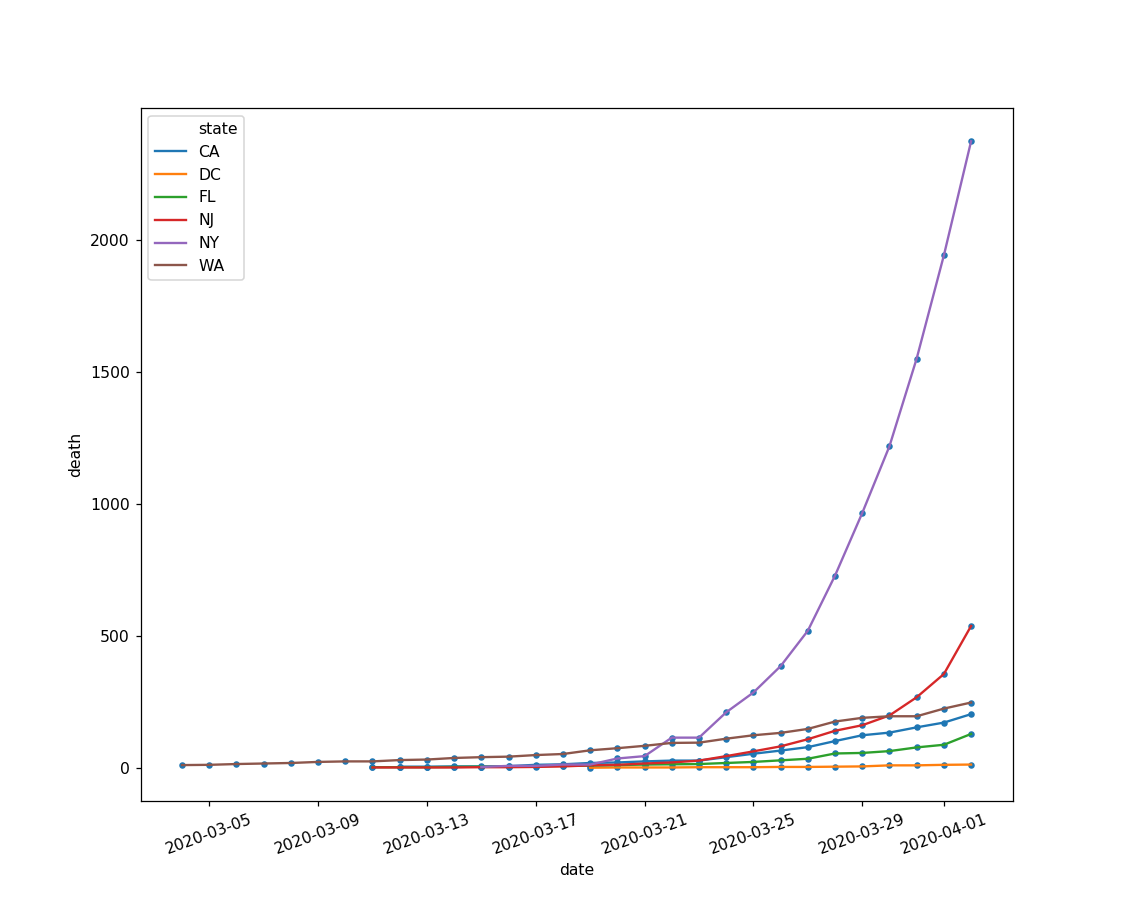

In [6]:
fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(ax = ax, data=df_states, x='date', y='death', hue='state')
plt.scatter(df_states['date'], df_states['death'], s=10)
plt.xticks(rotation=20)
plt.show()

### Hospitalized Histograms

In [7]:
df_403 = df[df['date']=='2020-04-03']
df_402 = df[df['date']=='2020-04-02']
df_401 = df[df['date']=='2020-04-01']
df_331 = df[df['date']=='2020-03-31']
df_330 = df[df['date']=='2020-03-30']
df_329 = df[df['date']=='2020-03-29']
df_328 = df[df['date']=='2020-03-28']
df_327 = df[df['date']=='2020-03-27']
df_326 = df[df['date']=='2020-03-26']
df_325 = df[df['date']=='2020-03-25']
df_324 = df[df['date']=='2020-03-24']
df_323 = df[df['date']=='2020-03-23']
df_322 = df[df['date']=='2020-03-22']
df_321 = df[df['date']=='2020-03-21']
df_320 = df[df['date']=='2020-03-20']

In [8]:
def metric_hist(metric):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.hist(df_403[metric], bins=15, label='4/3', alpha=0.7)    
    ax.hist(df_402[metric], bins=15, label='4/2', alpha=0.7)
    ax.hist(df_401[metric], bins=15, label='4/1', alpha=0.7)    
    ax.hist(df_331[metric], bins=15, label='3/31', alpha=0.7)        
    ax.hist(df_330[metric], bins=15, label='3/30', alpha=0.7)    
    ax.hist(df_329[metric], bins=15, label='3/29', alpha=0.7)
    ax.hist(df_328[metric], bins=15, label='3/28', alpha=0.7)    
    ax.hist(df_327[metric], bins=15, label='3/27', alpha=0.7)
    ax.hist(df_326[metric], bins=15, label='3/26', alpha=0.7)
    ax.hist(df_325[metric], bins=15, label='3/25', alpha=0.7)
    ax.hist(df_324[metric], bins=15, label='3/24', alpha=0.7)
    ax.hist(df_323[metric], bins=15, label='3/23', alpha=0.7)
    ax.hist(df_322[metric], bins=15, label='3/22', alpha=0.7)
    ax.hist(df_321[metric], bins=15, label='3/21', alpha=0.7)
    #plt.hist(df_320['hospitalized'], bins=15, label='3/20')
    ax.legend()
    plt.show()

In [ ]:
from ipykernel import kernelapp as app

<IPython.core.display.Javascript object>


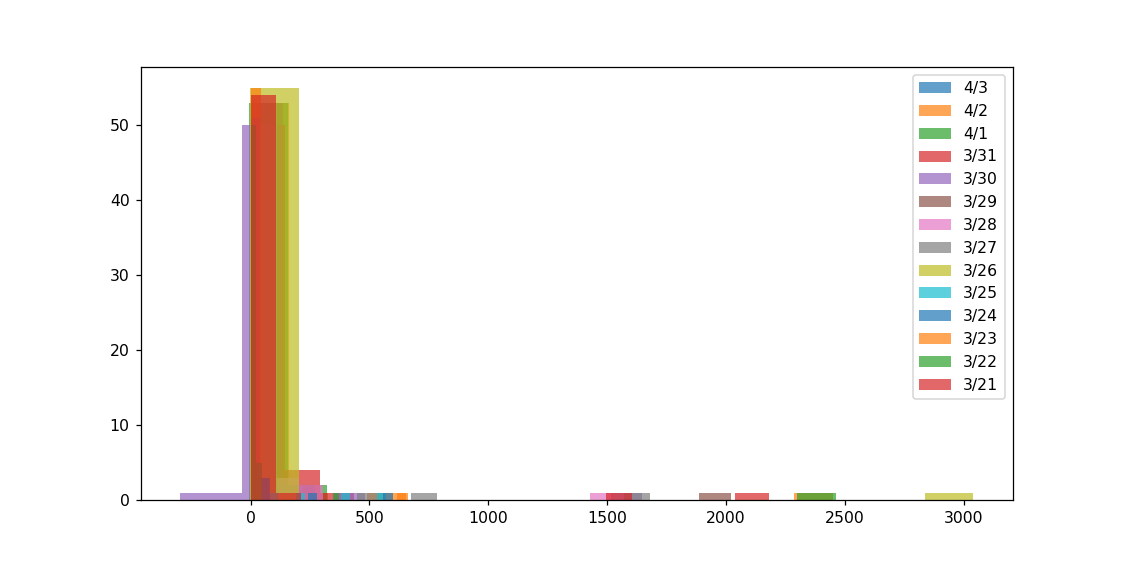

In [9]:
metric_hist('hospitalizedIncrease')

<IPython.core.display.Javascript object>


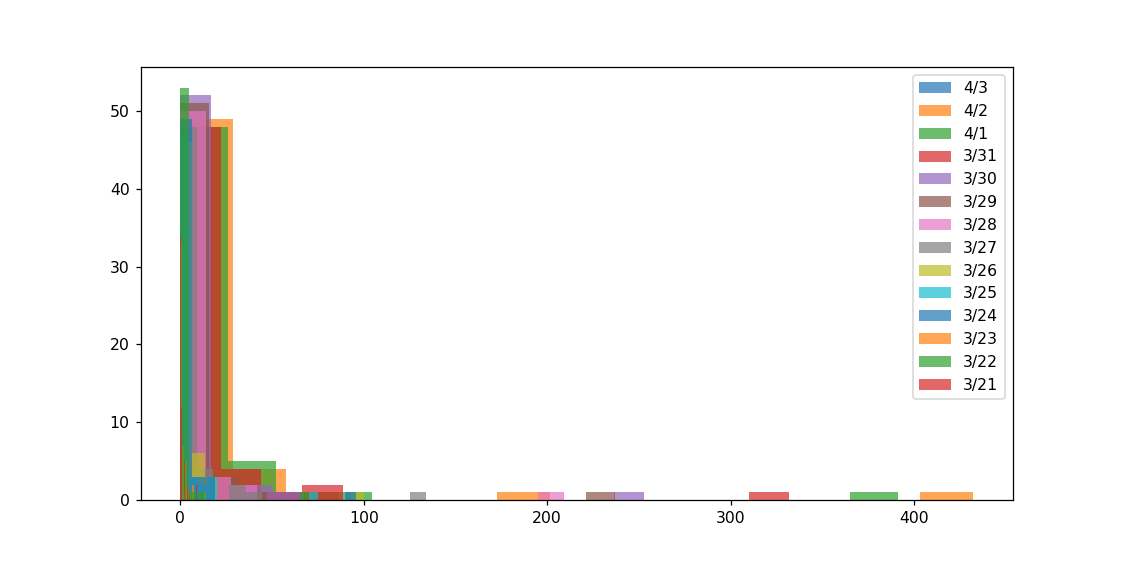

In [10]:
metric_hist('deathIncrease')

### Cumulative Cases

In [ ]:
df_states_positive = df_states[['date', 'state', 'positive']]
df_states_positive.head()

In [11]:
def metric_trender(state, metric):
    temp_df = df[df['state']==state]
    temp_df = temp_df[['date', 'state', metric]]
    fig, ax1 = plt.subplots(figsize=(10,5))
    sns.lineplot(ax = ax1, data=temp_df, x='date', y=metric, hue='state')
    ax1.scatter(temp_df['date'], temp_df[metric])
    plt.xticks(rotation=20)
    plt.show()

# Florida

<IPython.core.display.Javascript object>


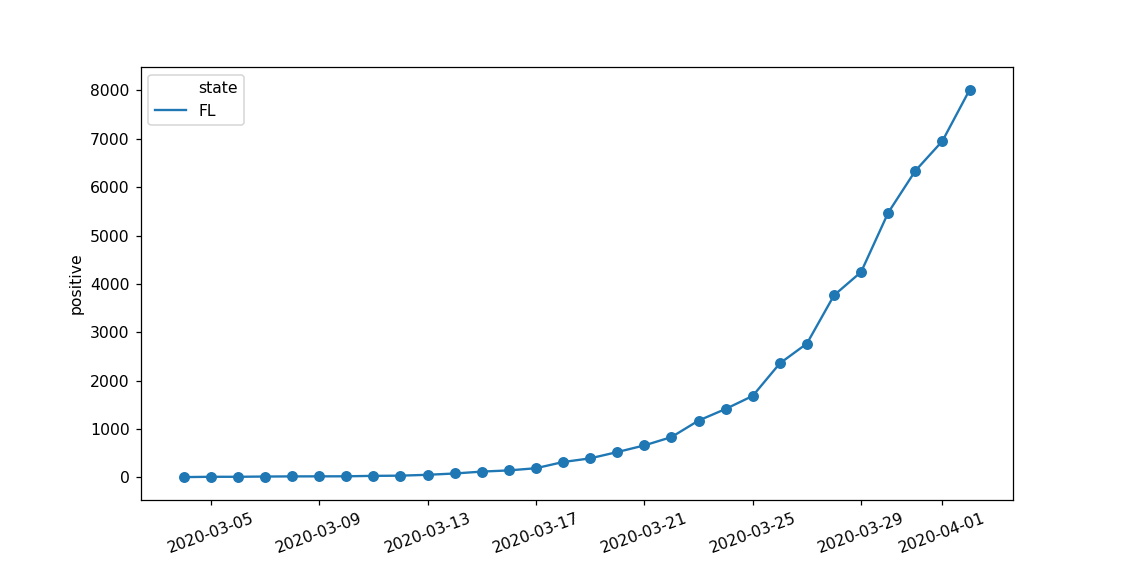

In [12]:
metric_trender(state='FL', metric='positive')

<IPython.core.display.Javascript object>


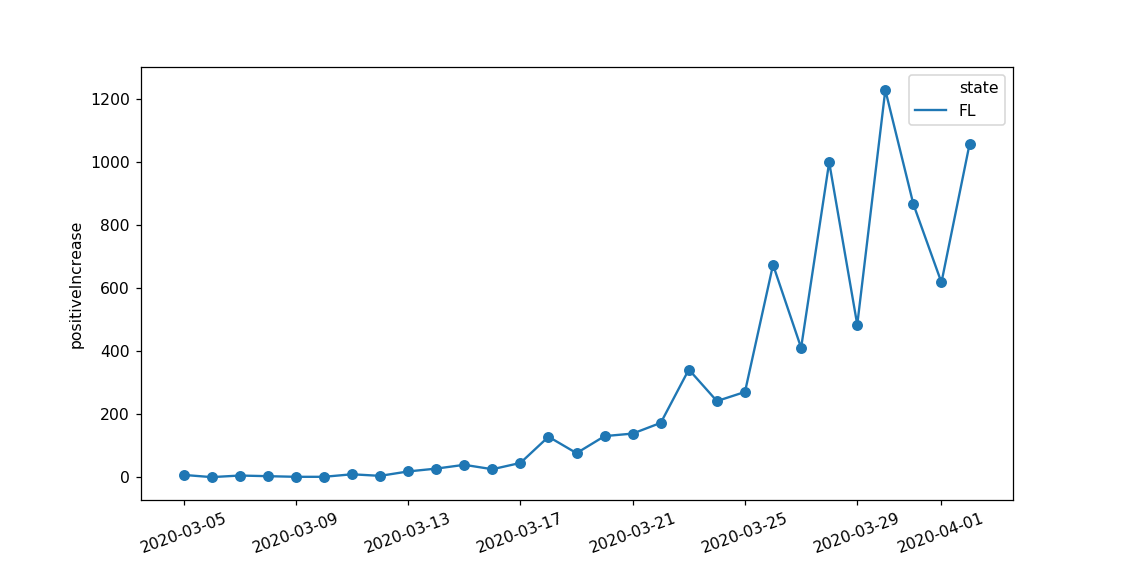

In [13]:
metric_trender(state='FL', metric='positiveIncrease')

In [ ]:
metric_trender(state='FL', metric='death')

In [ ]:
metric_trender(state='FL', metric='deathIncrease')

In [ ]:
metric_trender(state='FL', metric='hospitalized')

In [ ]:
metric_trender(state='FL', metric='hospitalizedIncrease')

# New York

<IPython.core.display.Javascript object>


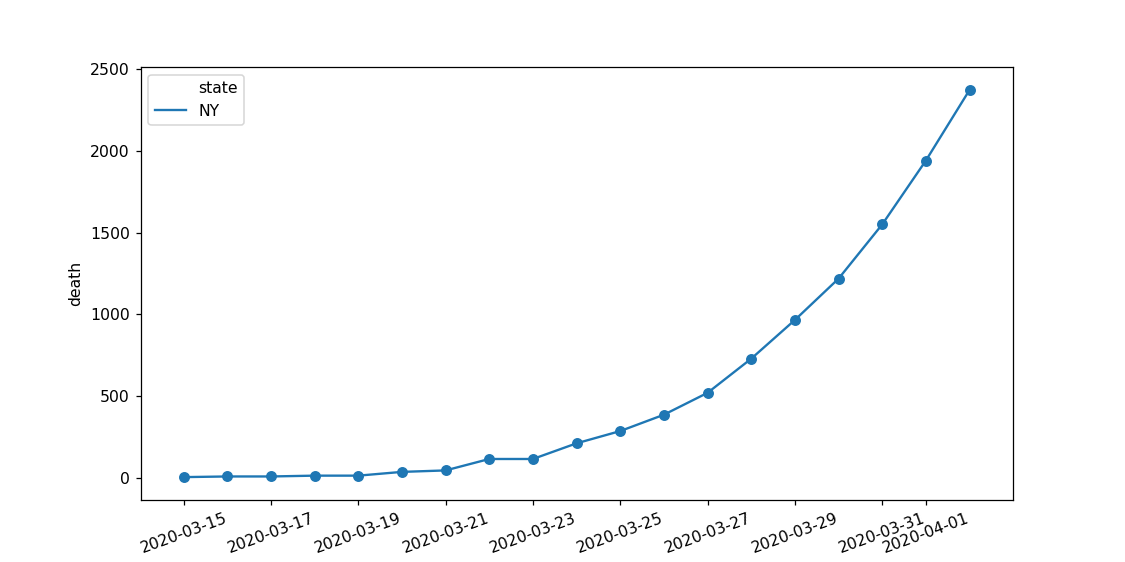

In [14]:
metric_trender(state='NY', metric='death')

<IPython.core.display.Javascript object>


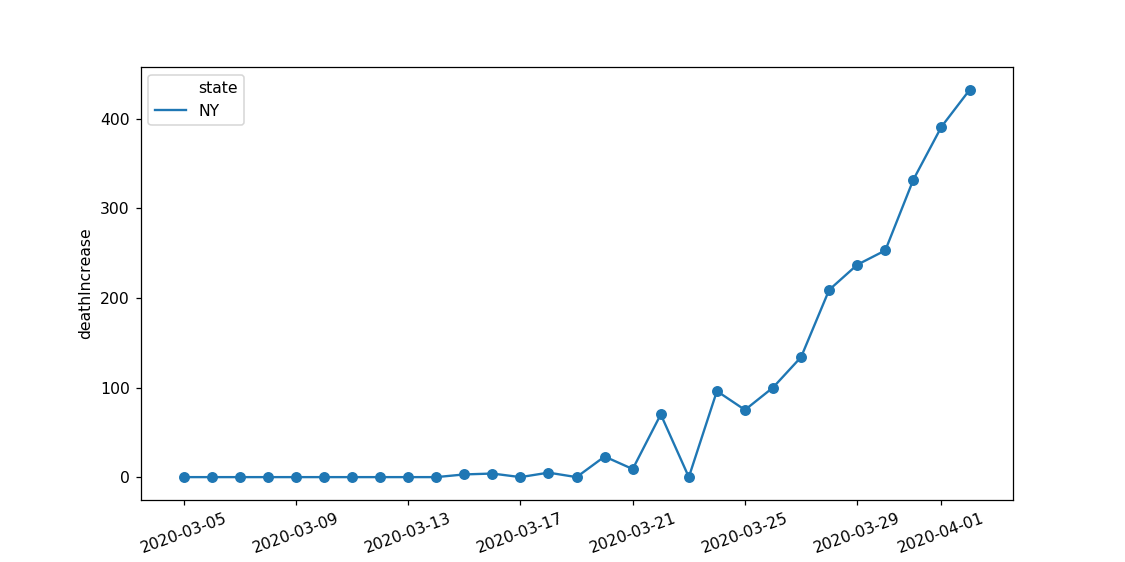

In [15]:
metric_trender(state='NY', metric='deathIncrease')

<IPython.core.display.Javascript object>


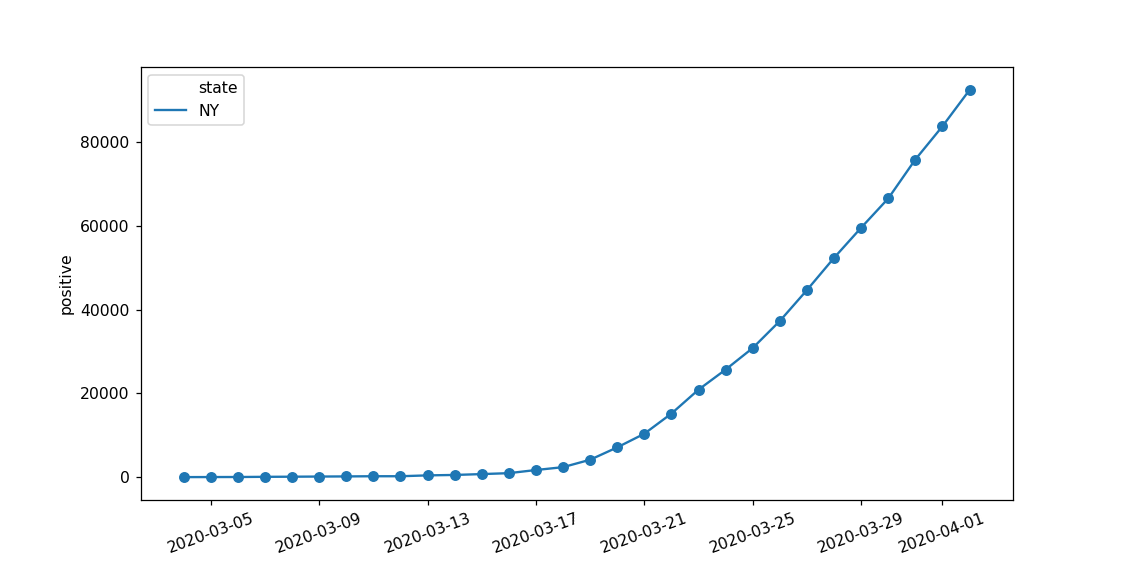

In [16]:
metric_trender(state='NY', metric='positive')

<IPython.core.display.Javascript object>


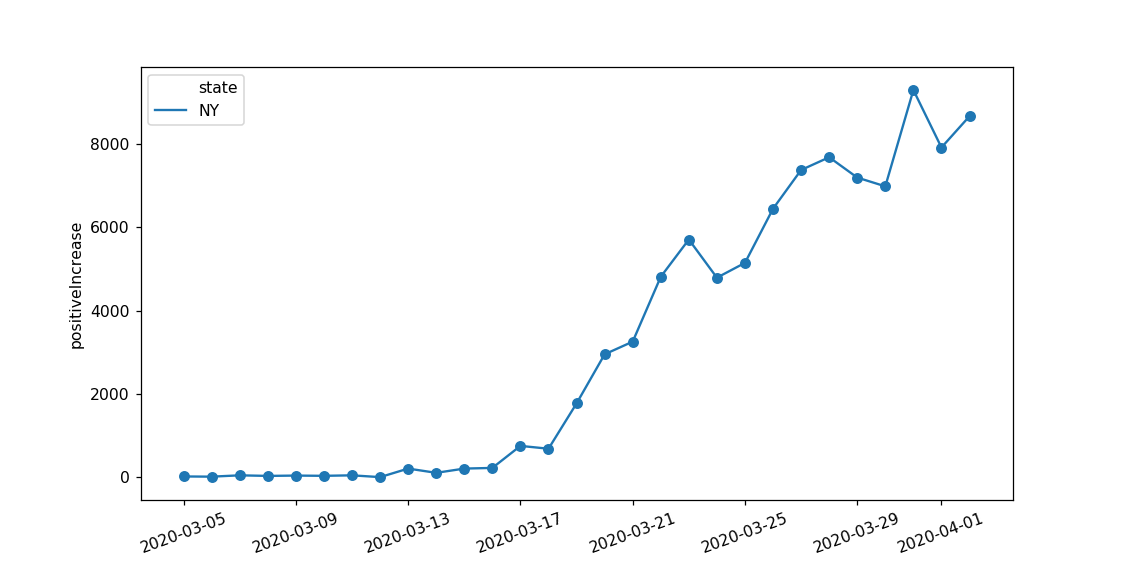

In [17]:
metric_trender(state='NY', metric='positiveIncrease')

<IPython.core.display.Javascript object>


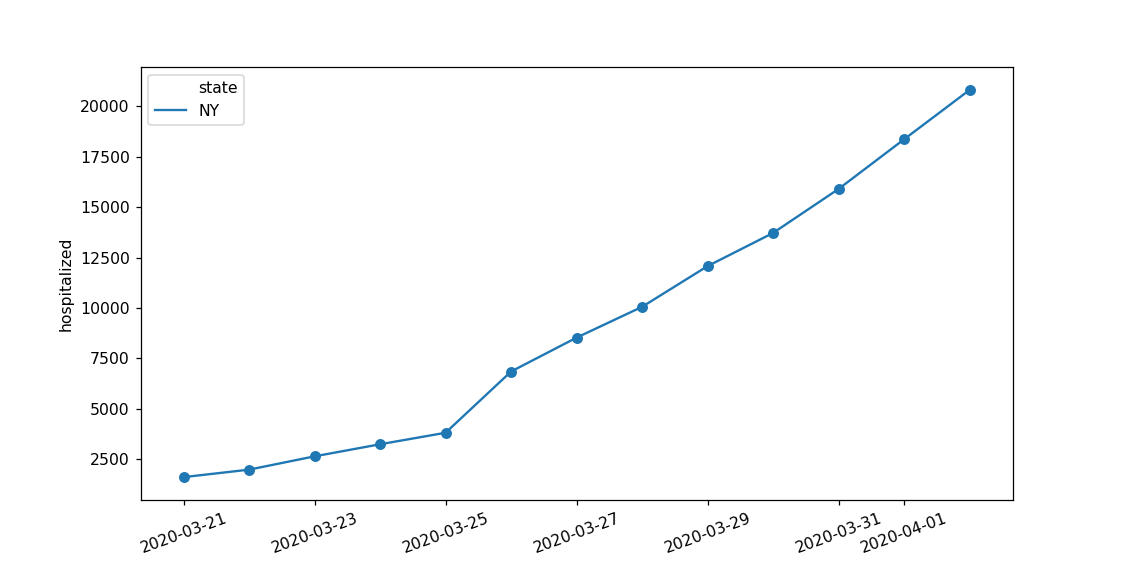

In [18]:
metric_trender(state='NY', metric='hospitalized')

<IPython.core.display.Javascript object>


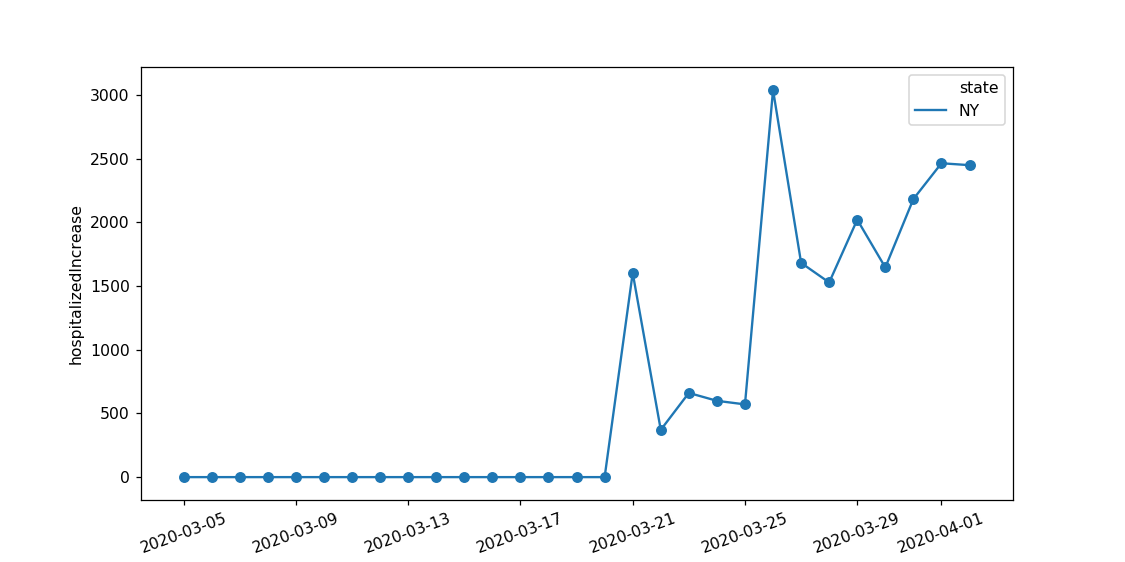

In [19]:
metric_trender(state='NY', metric='hospitalizedIncrease')

# Washington

In [ ]:
metric_trender(state='WA', metric='hospitalized')

In [ ]:
metric_trender(state='WA', metric='hospitalizedIncrease')

In [ ]:
metric_trender(state='WA', metric='death')

In [ ]:
metric_trender(state='WA', metric='deathIncrease')

### California

In [ ]:
metric_trender(state='CA', metric='death')

In [ ]:
metric_trender(state='CA', metric='deathIncrease')

In [ ]:
metric_trender(state='CA', metric='hospitalized')

In [ ]:
metric_trender(state='CA', metric='hospitalizedIncrease')

### Cumulative Death